In [ ]:
%matplotlib inline

# Neural Networks and Learning Machines
## Exercise 5 - Convolutional ANN and Transfer learning

In [4]:
epochs = 30

# Introduction
The goal of this exercise is for you to get a better understanding of what convolution is, how it is leveraged to increase the usability and performance of neural networks. The exercise will also teach you about transfer learning and the differences between fine-tuning/feature extraction. 

## Literature
This exercise will rely on the following sections in the [course book](https://www.deeplearningbook.org/).

- Chapter 9
    - Most of it
- Chapter 7
    - Section 7.4 - Dataset augmentation
- Chapter 15
    - Section 15.2 - Transfer learning
    
## Examination
Epochs are predefined to be 30. Feel free to increase/decrease this number depending on the hardware that you are working with. Just make sure that you use the same hyperparameters on tasks 2, 3 and 4. **Make sure you have all examination requirements in order before presenting.**

### Task 1
1. Implementation of same convolution.
2. The resulting image using 3 different filters.

### Task 2
1. The given network trained, validated and tested on the given dataset. Don't forget to make the train/validation/test split of the dataset. This can be achieved programmatically using https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split.
2. Some type of regularization should be used. You should understand how the chosen regularization technique works.
3. Report the training, validation and test accuracy. (Should beat randomly picking)
4. Calculate and plot the multi-class [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
5. Add some augmentation techniques which fits well with the data. Does this increase or decrease the validation accuracy?

### Task 3
1. Fine-tune Resnet18 on the given dataset.
2. Report the training, validation and test accuracy. (Should beat randomly picking)
3. Calculate and plot the multi-class [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
4. Add some augmentation techniques which fits well with the data. Does this increase or decrease the validation accuracy?

### Task 4
1. Use Resnet18 as a feature extractor on the dataset.
2. Report the training, validation and test accuracy. (Should beat randomly picking)
3. Calculate and plot the multi-class [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
4. Add some augmentation techniques which fits well with the data. Does this increase or decrease the validation accuracy?

# Convolution in Neural Networks
A convolutional neural network, CNN for short, is a type of ANN that consists of at least one convolutional layer. CNN's are often used where the input size may vary such as when we are dealing with image input. The architecture of CNNs was inspired by how the visual cortex functions in our brain.

## Task 1: Implement convolution
Implement 2d same convolution without using a built-in convolution function. This should function as described in [this blog post](https://jcbgamboa.github.io/2017/08/12/what-are-convolutions/). One of the great strengths of convolution is that it functions on any sized image, hence it is important that your implementation also does. Same convolution means that the dimensions of the output are the same as the dimensions of the input. This is achieved by padding the input.

Once you have implemented a function that performs 2d convolution, use that to perform convolution over all channels in this image. Show the result using 3 different filters.

To find the padding needed to get the input to be the same space as the output you can use the formula:

$$ n_{out} = \left \lfloor\frac{n_{in}+2p-k}{s} \right \rfloor+1 $$

where $n_{out}$ is the number of output features, $n_{in}$ is the number of input features, $k$ is the kernel size, $p$ is the padding size and $s$ is the stride size. You can assume that the stride is always 1.

[[ True  True False False]
 [ True  True False False]
 [False False False  True]
 [False False  True False]]
Failed to load image from dog.jpg


AttributeError: 'NoneType' object has no attribute 'shape'

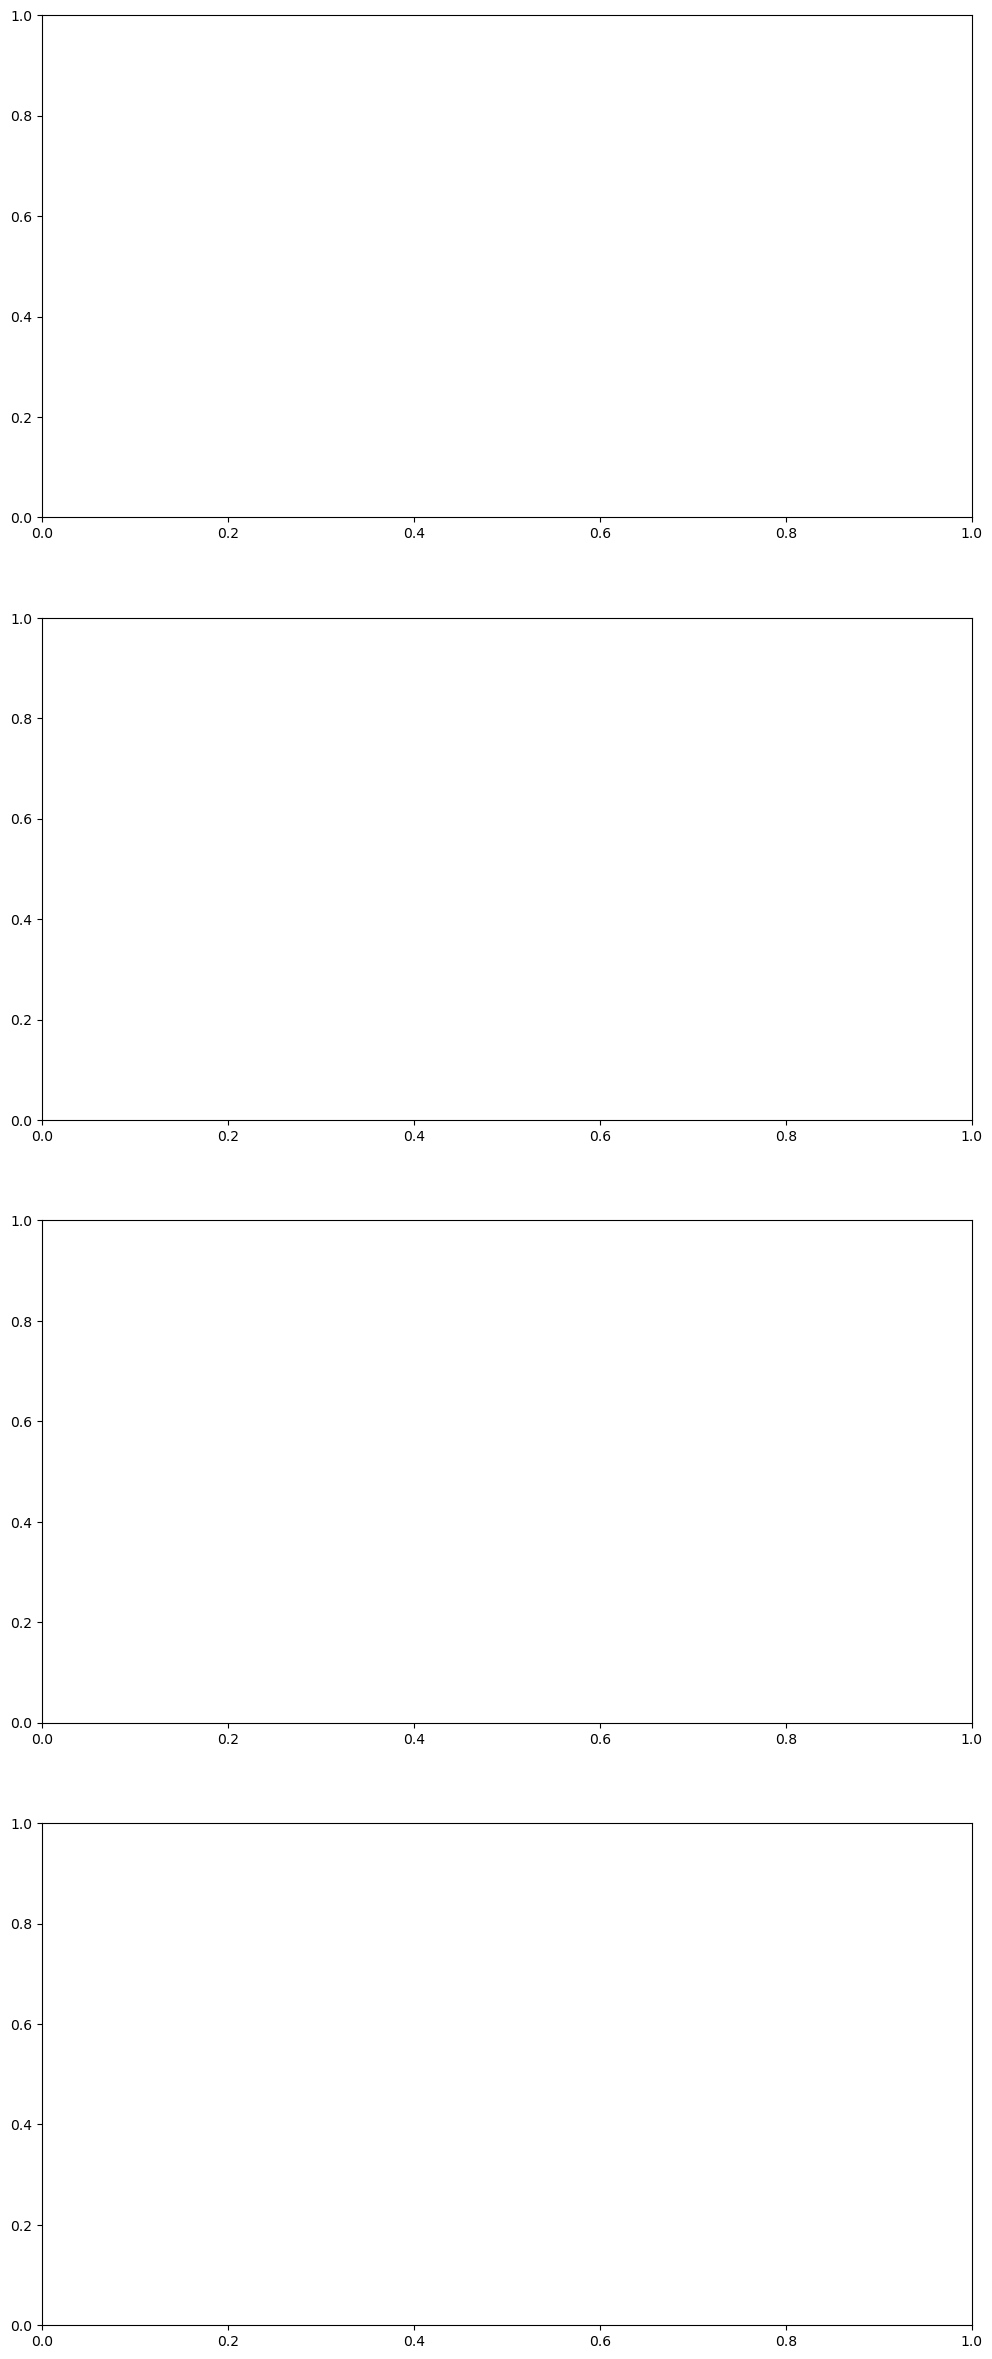

In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 30]
plt.rcParams['figure.dpi'] = 100

# Implement same convolution in the function below (kernel is a 2d numpy array an example of which can be found in the test)
def conv(image, kernel, strides=1):
    kernel_height,kernel_width=kernel.shape
    
    pad_height=(kernel_height-1)//2
    pad_width=(kernel_width-1)//2

    image_padded = np.pad(image, ((pad_height, pad_width)), mode='constant', constant_values=0)

    output_height = ((image.shape[0] + 2 * pad_height - kernel_height) // strides) + 1
    output_width = ((image.shape[1] + 2 * pad_width - kernel_width) // strides) + 1
    output=np.zeros((int(output_height),int(output_width)))

    for x in range(image.shape[1]):
        if x>image.shape[1]-kernel_width:
            break

        for y in range(image.shape[1]):
            if y>image.shape[0]-kernel_height:
                break

            output[y, x] = (kernel * image_padded[y: y + kernel_height, x: x + kernel_width]).sum()

    return output


# Our test, don't edit
inp = np.array([[1,1,1,1],[1,1,2,1],[1,-3,-4,1],[1,1,1,1]])
kernel = np.array([[0,1,0],[1,2,1],[0,1,0]]) # This is the second input of conv()

# If all are TRUE the convolution is implemented correctly
ans = np.array([[4, 5, 6, 4], [5, 3, 3, 6], [1, -7, -7, 0], [4, 1, 0, 4]])
print(conv(inp, kernel) == ans)

f, axarr = plt.subplots(4,1)

# How to load images using opencv
image_path = "dog.jpg" # add your file path here
#image2 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image = cv2.imread(image_path)

if image is None:
    print(f"Failed to load image from {image_path}")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # gray scale so we dont have to deal with more than 1 channel

# Define your 3 kernels
kernel_1 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example edge detection kernel
kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # Example sharpening kernel
kernel_3 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9  # Example blur kernel

# Perform the convolution (might take a couple of seconds depending on the implementation)
output1 = conv(image, kernel_1)
output2 = conv(image, kernel_2)
output3 = conv(image, kernel_3)

# plot the loaded image and the 3 convoluted images

axarr[0].imshow(image, cmap="gray")
axarr[1].imshow(output1, cmap="gray")
axarr[2].imshow(output2, cmap="gray")
axarr[3].imshow(output3, cmap="gray")

plt.show()

# Computer Vision
Computer vision (CV) is a task within the computer science field that aim is to extract high-level information from static images or video. Such high-level information can be, but is not limited to:
* Object detection - Detect and classify objects within input images
* Anomaly detection - Detect anomalies in the input images
* Semantic segmentation - Classify each pixel in the input image into different classes
* Object recognition - Classifying an entire image depending on what it contains

CV has been studied for multiple decades where early solutions used handwritten feature extractors to extract information from the input. However, with the increase of computing power together with the rise of deep learning algorithms, the main method used to solve CV problems is convolutional neural networks.

In this exercise, we will be taking a closer look at object recognition by first using a randomly initialized network and then utilizing transfer learning. **The dataset we will use for this exercise can be downloaded on canvas**. It is a subset of [this dataset](http://www.vision.caltech.edu/Image_Datasets/Caltech101/). Remember to split the data into separate training, validation and test set.

## Task 2: Implement the missing code and train it on the given dataset.
For task 2, implement the missing parts of the code below. The code should correctly train, validate and test the model. There are some comments guiding you through the process, however if something is unclear try to leverage the documentation for pytorch found [here](https://pytorch.org/docs/stable/index.html). You should also add some type of regularization into your model.

Remember to check the examination requirements in the start of this notebook.

In [ ]:
"""


import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision.models as models

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 2)

    def forward(self, x):
        # Implement the forward function in the network
        pass

# Implement a train model function so you can re_use it in task 3 and 4. 
# Should return the best performing model after training
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    pass


# Hyperparams. Set these to reasonable values
BATCH_SIZE = ...
SHUFFLE = ...
LEARNING_RATE = ...

# Train augmentations
transforms = transforms.Compose([
    # Add training augmentations here, remember: we do not want to transform the validation images.
    # For information about augmentation see: https://pytorch.org/vision/stable/transforms.html
])

# Load the full dataset, perform the training/validation/test split and then load the subsets into dataloaders.
# Remember that the training images should be augmentated.
DATA_DIR = "" # Path to dataset

train_loader = ...
val_loader = ...

# Load our network
model = Net()

# Define our loss function
criterion = ....

# Define our optimizer
optimizer = ....

# Train the model
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, epochs)

# Test the model
tested_model = ....
"""

In [8]:
"""
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import ImageFolder
import math
import numpy as np
from torchinfo import summary
import time
import os

# The TensorDataset and DataLoader are used to handle the data
from torch.utils.data import DataLoader

print("Imports DONE!")
# Random split is used to split the dataset into training, validation and test set
from torch.utils.data import random_split


class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)


class Net(nn.Module):
    def __init__(self, input_shape: tuple):
        super(Net, self).__init__()

        # Assuming the input shape is in the form (C, H, W)
        C, H, W = input_shape

        # Convolutional layers
        conv_layers = nn.Sequential(
            nn.Conv2d(C, 6, 5),
            nn.BatchNorm2d(6),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
        )

        # Dummy pass to get the output shape
        with torch.no_grad():
            dummy_input = torch.rand(1, *input_shape)  # Batch size of 1
            dummy_output = conv_layers(dummy_input)
            num_flat_features = np.prod(dummy_output.size()[1:])

        # Full model
        self.internal_model = nn.Sequential(
            conv_layers,
            Flatten(),
            nn.Dropout(0.2),
            nn.Linear(num_flat_features, 16 * 5 * 5),
            nn.ReLU(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Dropout(0.2),
            nn.Linear(120, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.internal_model(x)

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=30):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f"Validation Accuracy: {100 * correct / total}%")
    return model

# Hyperparameters
BATCH_SIZE = 64
SHUFFLE = True
LEARNING_RATE = 0.001

# Train augmentations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Assuming the dataset is in 'DATA_DIR'
DATA_DIR = "ANN3_dataset/101_ObjectCategories_2classes"  # Update this path
dataset = datasets.ImageFolder(DATA_DIR, transform=train_transforms)

# Splitting dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform = test_transforms
test_dataset.dataset.transform = test_transforms

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load our network
model = Net()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train the model
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, epochs=30)

# Add code for testing the model here if needed
"""

TypeError: train_model() got an unexpected keyword argument 'epochs'

Imports DONE!
<class 'torch.optim.adam.Adam'>


c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 2/25	Loss: 0.5294	Training Loss: 0.4092	Validation Accuracy: 0.7308
Epoch 3/25	Loss: 0.1532	Training Loss: 0.8297	Validation Accuracy: 0.9231
Epoch 4/25	Loss: 0.0202	Training Loss: 0.7142	Validation Accuracy: 1.0000
Epoch 6/25	Loss: 0.0802	Training Loss: 3.3142	Validation Accuracy: 0.9615
Epoch 8/25	Loss: 0.2087	Training Loss: 0.3151	Validation Accuracy: 0.9615
Epoch 10/25	Loss: 0.1637	Training Loss: 2.6892	Validation Accuracy: 0.9615
Epoch 12/25	Loss: 0.0090	Training Loss: 0.6939	Validation Accuracy: 1.0000
Epoch 14/25	Loss: 0.0149	Training Loss: 0.0017	Validation Accuracy: 1.0000
Epoch 16/25	Loss: 0.0004	Training Loss: 0.5296	Validation Accuracy: 1.0000
Epoch 18/25	Loss: 0.0228	Training Loss: 0.0600	Validation Accuracy: 1.0000
Epoch 20/25	Loss: 0.0017	Training Loss: 1.2957	Validation Accuracy: 1.0000
Epoch 22/25	Loss: 0.0001	Training Loss: 0.8258	Validation Accuracy: 1.0000
Epoch 24/25	Loss: 0.0193	Training Loss: 0.7518	Validation Accuracy: 1.0000


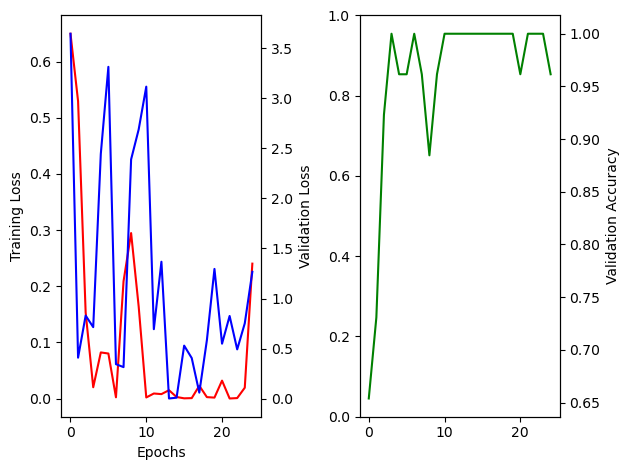

tensor([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])
tensor([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])
Confusion matrix, without normalization


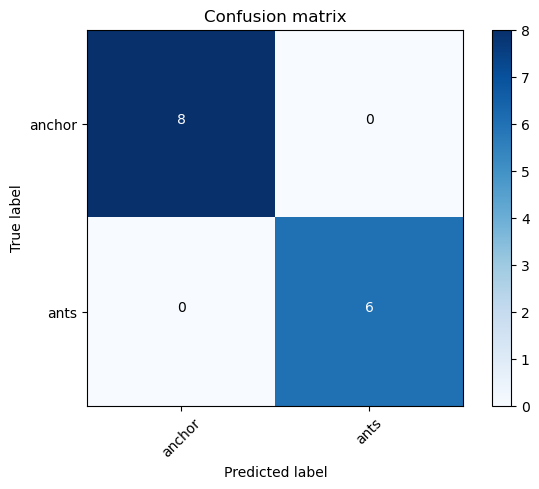

Current Working Directory: c:\Users\adam2
Directory 101_ObjectCategories_2classes found.
Dataset split done!
Loaders done!
Samples in loader: 64
Epoch 7/50	Loss: 0.5687	Training Loss: 0.6043	Validation Accuracy: 0.8462
Epoch 13/50	Loss: 0.4929	Training Loss: 0.4886	Validation Accuracy: 0.8077
Epoch 20/50	Loss: 0.4615	Training Loss: 0.5175	Validation Accuracy: 0.8846
Epoch 26/50	Loss: 0.3845	Training Loss: 0.4717	Validation Accuracy: 0.9231
Epoch 33/50	Loss: 0.3703	Training Loss: 0.4545	Validation Accuracy: 0.9231
Epoch 40/50	Loss: 0.3237	Training Loss: 0.3586	Validation Accuracy: 1.0000
Epoch 48/50	Loss: 0.3264	Training Loss: 0.4128	Validation Accuracy: 1.0000


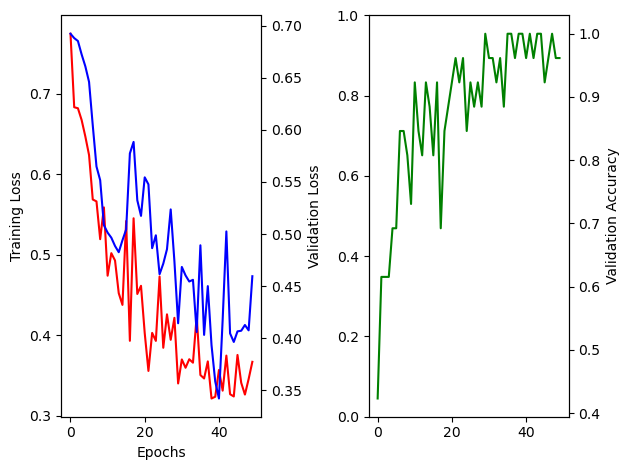

tensor([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])
tensor([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])
Confusion matrix, without normalization


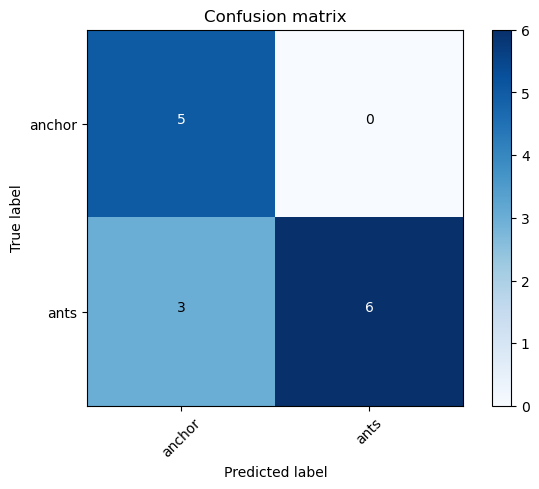

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 2]                    --
├─Sequential: 1-1                        [1, 2]                    --
│    └─Sequential: 2-1                   [1, 16, 13, 13]           --
│    │    └─Conv2d: 3-1                  [1, 6, 60, 60]            456
│    │    └─BatchNorm2d: 3-2             [1, 6, 60, 60]            12
│    │    └─LeakyReLU: 3-3               [1, 6, 60, 60]            --
│    │    └─MaxPool2d: 3-4               [1, 6, 30, 30]            --
│    │    └─Conv2d: 3-5                  [1, 16, 26, 26]           2,416
│    │    └─LeakyReLU: 3-6               [1, 16, 26, 26]           --
│    │    └─MaxPool2d: 3-7               [1, 16, 13, 13]           --
│    └─Flatten: 2-2                      [1, 2704]                 --
│    └─Dropout: 2-3                      [1, 2704]                 --
│    └─Linear: 2-4                       [1, 400]                  1,082,000
│   

In [45]:
#Michael's

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import ImageFolder
import math
import numpy as np
from torchinfo import summary
import time
import os
import torch
import torch.nn as nn
from torchvision import models
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# The TensorDataset and DataLoader are used to handle the data
from torch.utils.data import DataLoader
import numpy as np

print("Imports DONE!")
# Random split is used to split the dataset into training, validation and test set
from torch.utils.data import random_split


class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)


class Net(nn.Module):
    def __init__(self, input_shape: tuple):
        super(Net, self).__init__()

        # Assuming the input shape is in the form (C, H, W)
        C, H,W= input_shape

        # Convolutional layers
        conv_layers = nn.Sequential(
            nn.Conv2d(C, 6, 5),
            nn.BatchNorm2d(6),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
        )

        # Dummy pass to get the output shape
        with torch.no_grad():
            dummy_input = torch.rand(1, *input_shape)  # Batch size of 1
            dummy_output = conv_layers(dummy_input)
            num_flat_features = np.prod(dummy_output.size()[1:])

        # Full model
        self.internal_model = nn.Sequential(
            conv_layers,
            Flatten(),
            nn.Dropout(0.2),
            nn.Linear(num_flat_features, 16 * 5 * 5),
            nn.ReLU(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Dropout(0.2),
            nn.Linear(120, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.internal_model(x)


def confusion_matrix(predicted,labels):
    ants,anchor,anchor_tt,ants_tt=0,0,0,0
    for i in range(len(predicted)):
        if predicted[i]==labels[i]==1:
            ants_tt+=1
        if predicted[i] == labels[i]==0:
            anchor_tt+=1
        if predicted[i] == 1 and labels[i]==0:
            ants+=1
        if predicted[i] ==0 and labels[i]==1:
            anchor+=1
    

    cm=[[ants_tt,ants],[anchor,anchor_tt]]
    class_names=["anchor","ants"]
    return cm,class_names

    

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm=np.array(cm)
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming you have a list or array of class names:
#class_names = ['class1', 'class2', 'class3']  # Update this to your actual class names

# Plot non-normalized confusion matrix
#plt.figure(figsize=(10, 8))
#plot_confusion_matrix(cm, classes=class_names,
#title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure(figsize=(10, 8))
#plot_confusion_matrix(cm, classes=class_names, normalize=True,
#                     title='Normalized confusion matrix')

#plt.show()
# Implement a train model function so you can re_use it in task 3 and 4.
# Should return the best performing model after training
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):

    # All acurracy and loss metrics should be stored in these lists
    validation_losses = []
    validation_accuracy = []
    train_losses = []

    # Best validation loss initialized as a very high number
    best_loss = 10e6

    # Keeps track of the current validation accuracy
    current_validation_accuracy = 0

    # Keeps track of the current training loss
    current_training_loss = 0

    # Keeps track of the best validation loss
    current_validation_loss = 0

    # Initialize the previous time
    prev_time = time.time()

    for epoch in range(num_epochs):

        # Enter training mode to train
        # the model on the training set
        model.train()

        for batch_nr, (inputs, labels) in enumerate(train_loader):

            # Clear the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            current_training_loss = criterion(outputs, labels)

            # Sanity check I am not entering the sea of NaNs
            if math.isnan(current_training_loss):
                raise RuntimeError("ERROR: Loss is NaN")

            # Backward pass
            current_training_loss.backward()

            # Update the weights
            optimizer.step()

            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)
            current_validation_accuracy = (predicted == labels).sum().item() / len(labels)


        # Enter evaluation mode to evaluate
        # the model on the validation set
        model.eval()

        for batch_nr, (inputs, labels) in enumerate(val_loader):
            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            current_validation_loss = criterion(outputs, labels)

            # Update the best model if the current model is better
            if current_validation_loss < best_loss:
                torch.save(model ,"best_model.pth")
                best_loss = current_validation_loss


        # Appends our epoch statistics to the lists
        validation_losses.append(current_validation_loss.item())
        validation_accuracy.append(current_validation_accuracy)
        train_losses.append(current_training_loss.item())

        # Prints current epoch
        if (time.time() - prev_time) > 1:
            print(f"Epoch {epoch + 1}/{num_epochs}\tLoss: {current_training_loss:.4f}\tTraining Loss: {current_validation_loss:.4f}\tValidation Accuracy: {current_validation_accuracy:.4f}")
            prev_time = time.time()


    return validation_losses, train_losses, validation_accuracy

# This tests our model and returns a benchmark of it's performance.
def test_model(criterion, test_loader):
    best_model = torch.load("best_model.pth")

    best_model.eval()

    current_batch_accuracies = []
    current_losses = []
    ants,anchor,anchor_tt,ants_tt=0,0,0,0
    for batch_nr, (inputs, labels) in enumerate(test_loader):
        # Forward pass
        outputs = best_model(inputs)

        # Calculate the loss
        current_losses.append(criterion(outputs, labels))

        # Accuracy calculation
        _, predicted = torch.max(outputs, 1)
        print(predicted)
        print(labels)
        current_batch_accuracies.append((predicted == labels).sum().item() / len(labels))

        for i in range(len(predicted)):
            if predicted[i]==labels[i]==1:
                ants_tt+=1
            if predicted[i] == labels[i]==0:
                anchor_tt+=1
            if predicted[i] == 1 and labels[i]==0:
                ants+=1
            if predicted[i] ==0 and labels[i]==1:
                anchor+=1
       
    cm=[[ants_tt,ants],[anchor,anchor_tt]]
    class_names=["anchor","ants"]
    plot_confusion_matrix(cm,class_names)
    #cm,class_names=confusion_matrix(predicted,labels)
        


        

        #cm=[[ants_tt,ants],[anchor,anchor_tt]]
        #class_names=["anchor","ants"]

        
        #print(ants_tt,anchor_tt,ants,anchor)



def plot(validation_losses, train_losses, validation_accuracy, epochs):
    # Plots the training loss, validation loss and validation accuracy
    epochs_range = range(epochs)

    # One plot should have the training loss and
    # validation loss and the other the validation accuracy
    fig, ax1 = plt.subplots(1, 2)
    ax2 = ax1[0].twinx()
    ax3 = ax1[1].twinx()

    # Defines the labels with appropariate colors.
    ax1[0].set_xlabel("Epochs")
    ax1[0].set_ylabel("Training Loss")
    ax2.set_ylabel("Validation Loss")
    ax3.set_ylabel("Validation Accuracy")

    ax1[0].plot(epochs_range, train_losses, label="Training loss (red)", color="r")
    ax2.plot(epochs_range, validation_losses, label="Validation loss (blue)", color="b")
    ax3.plot(epochs_range, validation_accuracy, label="Validation accuracy", color="g")

    fig.tight_layout()

    plt.show()

num_classes = 2  # Change this to the number of classes in your dataset

model_ft = models.resnet18(weights=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, num_classes)

criterion_ft = nn.CrossEntropyLoss()

# Optimize all parameters. Alternatively, you could only optimize model_ft.fc.parameters()
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.001)
print(type(optimizer_ft))

epochs = 25  # Define the number of epochs

# Assuming train_model is correctly implemented as discussed
trained_model_ft = train_model(model_ft, criterion_ft, optimizer_ft, train_loader, val_loader, num_epochs=epochs)

plot(*trained_model_ft, epochs)

# Placeholder for test model function - implement this based on your needs
tested_model = test_model(criterion_ft, test_loader)

"""    
ants_tt=(predicted == labels and predicted==1).sum().item() #pred ant, true ant
anchor_tt=(predicted == labels and predicted== 0).sum().item() #pred anchor, true anchor
ants=(predicted == 1 and labels==0).sum().item() #pred ant, true anchor
anchor=(predicted ==0 and labels==1).sum().item() #pred anchor, true ant

print(ants_tt,anchor_tt) 

anchor=len(predicted)-ants
"""
# prints the average accuracy
#print(f"\nAverage test accuracy: {np.mean(current_batch_accuracies)}\n")

# Hyperparams. Set these to reasonable values
BATCH_SIZE = 32
SHUFFLE = True
LEARNING_RATE = 0.001

# Train augmentations
trans = transforms.Compose([
    transforms.ToTensor()
])

# Load the full dataset, perform the training/validation/test split and then load the subsets into dataloaders.
# Remember that the training images should be augmentated.
DATA_DIR = "101_ObjectCategories_2classes"  # Path to dataset
print("Current Working Directory:", os.getcwd())

if os.path.exists(DATA_DIR):
    print(f"Directory {DATA_DIR} found.")
else:
    print(f"Directory {DATA_DIR} does not exist. Check your path.")


# The data is in the sub directories anchor and ant to DATA_DIR
dataset = ImageFolder(DATA_DIR, transform=trans)

# Calculate split sizes
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - (train_size + val_size)

# Split the dataset
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])
print("Dataset split done!")

# Training transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# make sure our training set is augmented
train_set.dataset.transform = train_transforms

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)
print("Loaders done!")
print(f"Samples in loader: {len(train_loader)*BATCH_SIZE}")
# Load our network
model = Net(input_shape=(3, 64,64))

# Define our loss function
criterion = torch.nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

# Epochs
epochs = 50

# Train the model
validation_losses, train_losses, validation_accuracy = train_model(model, criterion, optimizer,
                                                                                  train_loader, val_loader, epochs)

# Plots the training loss, validation loss and validation accuracy
epochs_range = range(epochs)

# One plot should have the training loss and
# validation loss and the other the validation accuracy
fig, ax1 = plt.subplots(1, 2)
ax2 = ax1[0].twinx()
ax3 = ax1[1].twinx()

# Defines the labels with appropariate colors.
ax1[0].set_xlabel("Epochs")
ax1[0].set_ylabel("Training Loss")
ax2.set_ylabel("Validation Loss")
ax3.set_ylabel("Validation Accuracy")

ax1[0].plot(epochs_range, train_losses, label="Training loss (red)", color="r")
ax2.plot(epochs_range, validation_losses, label="Validation loss (blue)", color="b")
ax3.plot(epochs_range, validation_accuracy, label="Validation accuracy", color="g")

fig.tight_layout()

plt.show()

# Test the model

tested_model = test_model(criterion, test_loader)


# Calculate and plot the multi-class confusion matrix



summary(model, input_size=(1, 3, 64, 64))



# Transfer learning
Transfer learning refers to the practice to use a model which has already been pre-trained on a large dataset to be able to solve task $T_1$, replace the output layer or a few of the upper layers within this model and retrain the model on a smaller dataset to be able to solve task $T_2$. Formally this can be described as the following:

__Def 1:__ Let $D_s$ be the source domain and $T_s$ be the corresponding source task. Let $D_t$ be the target domain and $T_t$ be the corresponding target task. Let $f_t$ be the predictive function for $T_s$. Thus transfer learning aims to improve the learning of $f_t$ in $D_t$ using the already learned knowledge in $D_s$ and $T_s$ where $D_s \neq D_t$ and $T_s \neq T_t$.

The benefit from using transfer learning is that we can train an accurate computer vision model with relatively small amounts of data and computing resources compared to the costly pretraining process of the full convolutional neural network (a few days using multiple GPUs). 

## Fine-tuning and Feature extraction
There are two main ideas when it comes to transfer learning, fine-tuning and feature extraction. When using fine-tuning we allow all weights to be changed during the training phase. However, when we use the pre-trained model as a feature extractor we instead freeze earlier layers of the model, which means that the weights in those layers will not be updated during the training phase and we only update the weights in the upper layers that we have replaced. 

This works because low-level information extracted from the input image is universal between tasks, examples of such information is edge detection, shape detection and pattern detection. This is what the early layers are optimized to do, where later layers extract more abstract features relevant for the task. 

Most of the pre-trained models in PyTorch are trained on [ImageNet](http://www.image-net.org/). 

In this exercise, we use ResNet18 as our model. You should make yourself familiar with the Resnet18 architecture using, for example, [the paper](https://arxiv.org/abs/1512.03385).

## Task 3: Fine-tuning
In task 3 you should fine-tune Resnet18 to the small dataset which is provided above. Some code has been given to you. Remember to re-use functions (such as trained_model) from task 2 to decrease the implementation time.

Remember to check the examination requirements at the start of this notebook.

In [ ]:
"""

# Fine-tune a model to the dataset
# We use resnet18 as the model.
model_ft = models.resnet18(pretrained=True)

# Do the things required for fine-tuning before training the model

# Train the model
trained_model_ft = train_model(model_ft, criterion_ft, optimizer_ft, train_loader, val_loader, epochs)

# Test the model
tested_model = ....
"""

<class 'torch.optim.adam.Adam'>
Epoch 2/25	Loss: 0.3812	Training Loss: 1.1336	Validation Accuracy: 0.8077
Epoch 4/25	Loss: 0.1576	Training Loss: 7.5228	Validation Accuracy: 0.9615
Epoch 6/25	Loss: 0.0813	Training Loss: 1.2649	Validation Accuracy: 0.9615
Epoch 8/25	Loss: 0.1014	Training Loss: 0.0231	Validation Accuracy: 0.9615
Epoch 10/25	Loss: 0.0860	Training Loss: 2.1969	Validation Accuracy: 0.9615
Epoch 12/25	Loss: 0.0043	Training Loss: 0.0002	Validation Accuracy: 1.0000
Epoch 14/25	Loss: 0.0046	Training Loss: 0.1419	Validation Accuracy: 1.0000
Epoch 16/25	Loss: 0.0017	Training Loss: 0.0298	Validation Accuracy: 1.0000
Epoch 18/25	Loss: 0.0333	Training Loss: 0.0056	Validation Accuracy: 0.9615
Epoch 20/25	Loss: 0.0011	Training Loss: 0.1844	Validation Accuracy: 1.0000
Epoch 22/25	Loss: 0.0008	Training Loss: 0.0064	Validation Accuracy: 1.0000
Epoch 24/25	Loss: 0.0772	Training Loss: 0.0124	Validation Accuracy: 0.9615


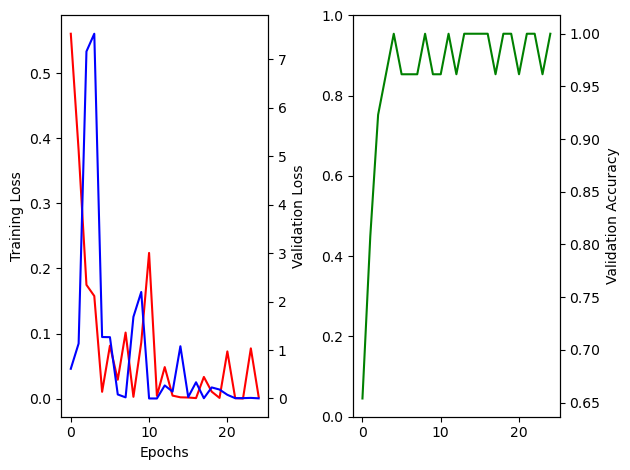


Average test accuracy: 0.9285714285714286



In [20]:
import torch
import torch.nn as nn
from torchvision import models
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have a list or array of class names:
class_names = ['class1', 'class2', 'class3']  # Update this to your actual class names

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

def plot(validation_losses, train_losses, validation_accuracy, epochs):
    # Plots the training loss, validation loss and validation accuracy
    epochs_range = range(epochs)

    # One plot should have the training loss and
    # validation loss and the other the validation accuracy
    fig, ax1 = plt.subplots(1, 2)
    ax2 = ax1[0].twinx()
    ax3 = ax1[1].twinx()

    # Defines the labels with appropariate colors.
    ax1[0].set_xlabel("Epochs")
    ax1[0].set_ylabel("Training Loss")
    ax2.set_ylabel("Validation Loss")
    ax3.set_ylabel("Validation Accuracy")

    ax1[0].plot(epochs_range, train_losses, label="Training loss (red)", color="r")
    ax2.plot(epochs_range, validation_losses, label="Validation loss (blue)", color="b")
    ax3.plot(epochs_range, validation_accuracy, label="Validation accuracy", color="g")

    fig.tight_layout()

    plt.show()

num_classes = 2  # Change this to the number of classes in your dataset

model_ft = models.resnet18(weights=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, num_classes)

criterion_ft = nn.CrossEntropyLoss()

# Optimize all parameters. Alternatively, you could only optimize model_ft.fc.parameters()
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.001)
print(type(optimizer_ft))

epochs = 25  # Define the number of epochs

# Assuming train_model is correctly implemented as discussed
trained_model_ft = train_model(model_ft, criterion_ft, optimizer_ft, train_loader, val_loader, num_epochs=epochs)

plot(*trained_model_ft, epochs)

# Placeholder for test model function - implement this based on your needs
tested_model = test_model(criterion_ft, test_loader)

## Task 4: Feature extraction
In task 4, you should use Resnet18 as a feature extractor. Similarly to task 3, some code has been provided. Remember to re-use as much code as you can. 

Once again, check the examination requirements so you don't forget to implement some required functionality.

c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(


Epoch 5/25	Loss: 0.6493	Training Loss: 0.6567	Validation Accuracy: 0.6538
Epoch 10/25	Loss: 0.4484	Training Loss: 0.7188	Validation Accuracy: 0.8077
Epoch 14/25	Loss: 0.3957	Training Loss: 0.4571	Validation Accuracy: 0.8462
Epoch 19/25	Loss: 0.5013	Training Loss: 0.9417	Validation Accuracy: 0.8077
Epoch 24/25	Loss: 0.2667	Training Loss: 0.5230	Validation Accuracy: 0.9615


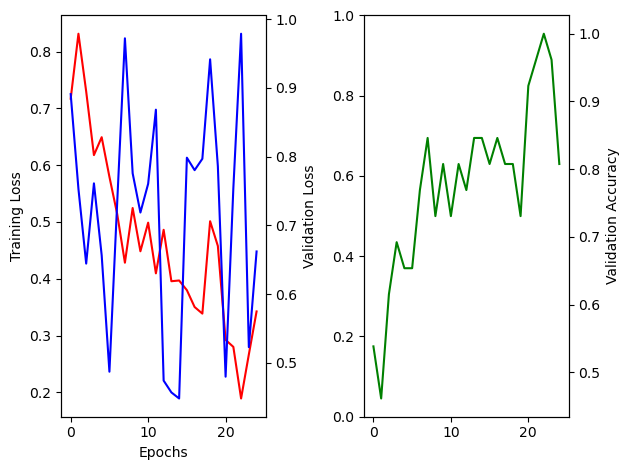


Average test accuracy: 0.7857142857142857



In [21]:
import torch
import torch.nn as nn
from torchvision import models

# Use a predefined model as a feature extractor
epochs = 25
# We use resnet18 as the model.
model_fe = models.resnet18(pretrained=True)

for param in model_fe.parameters():
    param.requires_grad = False

num_classes = 2 # Update this to match the number of classes in your dataset
num_ftrs = model_fe.fc.in_features
model_fe.fc = nn.Linear(num_ftrs, num_classes)

# Do the things required for fine-tuning before training the model

criterion_fe = nn.CrossEntropyLoss()

# Optimize all parameters. Alternatively, you could only optimize model_ft.fc.parameters()
optimizer_fe = torch.optim.Adam(model_fe.parameters(), lr=0.001)

# Train the model
trained_model_fe = train_model(model_fe, criterion_fe, optimizer_fe, train_loader, val_loader, epochs)

plot(*trained_model_fe, epochs)

# Test the model
tested_model = test_model(criterion_fe,test_loader)